In [1]:
import keras
from keras import layers
from keras.datasets import mnist
from keras.losses import BinaryCrossentropy
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

'max-min narmalize:將數值標準化成0-1'

'reshape data size:將圖片轉成一維(28, 28) -> (784)'

print(x_train.shape)
print(x_test.shape)

one_train = []
one_test = []
other_test = []
#將訓練集中「數字1」的圖片存入one_train (append)
for i in range(x_train.shape[0]):
    ...
        
#將資料集中「數字1」的圖片存入one_test，其餘存入other_test
for i in range(x_test.shape[0]):
    ...

#將list轉成np array
train_data = np.array(one_train)
one_test = np.array(one_test)
other_test = np.array(other_test)

'選擇是否加入噪音進行訓練'
# 'one_train加入noise'
# x_noise = np.array(one_train)
# x_noise = x_noise + 0.2 * np.random.normal(0, 1, size=x_noise.shape)
# x_noise = np.clip(x_noise, 0., 1.)
# one_train = np.concatenate([one_train, x_noise])

# 'one_test加入noise'
# x2_noise = np.array(one_test)
# x2_noise = x2_noise + 0.2 * np.random.normal(0, 1, size=x2_noise.shape)
# x2_noise = np.clip(x2_noise, 0., 1.)
# one_test = np.concatenate([one_test, x2_noise])

# 'other_test加入noise'
# y_noise = np.array(other_test)
# y_noise = y_noise + 0.2 * np.random.normal(0, 1, size=y_noise.shape)
# y_noise = np.clip(y_noise, 0., 1.)
# other_test = np.concatenate([other_test, y_noise])

In [3]:
###  encoder  ###
input_img = keras.Input(shape=(784,))
''''
請設計encoder的網路
''''

###  decoder  ###
''''
請設計decoder的網路
''''
decoded = ...

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#'僅'訓練「數字1」的圖片
autoencoder.fit( ... , ... ,
                epochs=...,
                batch_size=...,
                shuffle=True,
                validation_data=( ... , ... ))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 6742 samples, validate on 1135 samples
Epoch 1/50
6742/6742 [==============================] - 0s 69us/step - loss: 0.4193 - val_loss: 0.1492
Epoch 2/50
6742/6742 [==============================] - 0s 16us/step - loss: 0.1235 - val_loss: 0.1020
Epoch 3/50
6742/6742 [==============================] - 0s 16us/step - loss: 0.0945 - val_loss: 0.0862
Epoch 4/50
6742/6742 [==============================] - 0s 16us/step - loss: 0.0845 - val_loss: 0.0795
Epoch 5/50
6742/6742 [==============================] - 0s 16us/step - loss: 0.0791 - val_loss: 0.0754
Epoch 6/50
6742/6742 [==============================] - 0s 16us/step - loss: 0.0753 - val_loss: 0.0719
Epoch 7/50
6742/6742 [==============================] - 0s 16us/step - loss: 0.0712 - val_loss: 0.0667
Epoch 8/50
6742/6742 [==============================] -

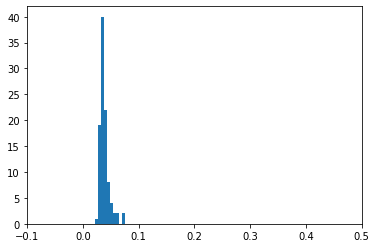

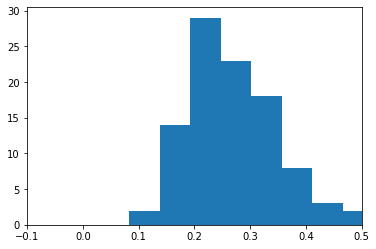

In [4]:
one_de = autoencoder.predict(one_test)
other_de = autoencoder.predict(other_test)

one_loss_lst = []
other_loss_lst = []

def cross_entropy(targets, predictions):
    N = len(predictions)
    ce = -np.sum(targets * np.log(predictions)) / N
    return ce

for i in range(100):
    loss = cross_entropy(one_test[i], one_de[i])
    one_loss_lst.append(loss)

plt.hist(one_loss_lst)
plt.xlim(-.1, .5)
plt.show()

for i in range(100):
    loss = cross_entropy(other_test[i], other_de[i])
    other_loss_lst.append(loss)

plt.hist(other_loss_lst)
plt.xlim(-.1, .5)
plt.show()